### Kmeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

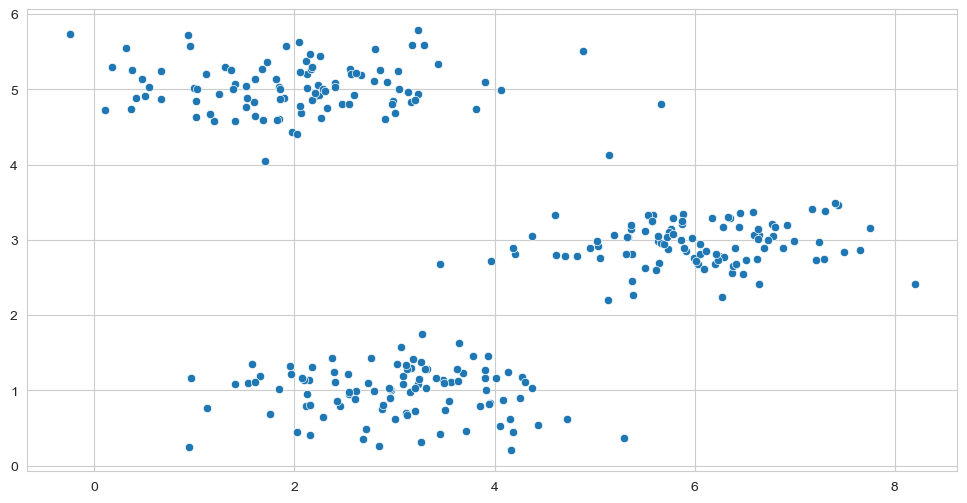

In [ ]:
X = np.load("ex7_X.npy")
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.scatterplot(x = X[:,0], y = X[:,1])


In [ ]:
class KMeans():
    def __init__(self, n_clusters = None, max_iter = None, init_centroids = None):
        
        self.n_clusters = n_clusters
        self.Centroids = init_centroids
        self.max_iter = max_iter

    def Initializing_Centroids(self, X):
        """Randomly pick K training examples"""

        if self.Centroids == None:
            indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            self.Centroids = X[indices]

    def Assign_Point(self, X, Centroids):
        """Assign points to cluster centroids"""

        m = len(X)
        c = np.array([0] * m)
        for idx in range(m):
            Min_dist = np.Inf
            for cen_idx in range(self.n_clusters):
                dist = np.sum((Centroids[cen_idx,:] - X[idx,:])**2)
                if dist < Min_dist:
                    Min_dist = dist
                    c[idx] = cen_idx
        return c
    
    def Move_Centroids(self, X, c):
        """Move centroids to average of points"""

        for i in range(self.n_clusters):
            self.Centroids[i,:] = np.mean(X[c == i,:], axis= 0)


    def fit(self, X):

        self.Initializing_Centroids(X)

        for i in range(self.max_iter):
            cluster = self.Assign_Point(X, self.Centroids)
            self.Move_Centroids(X, c= cluster)
        
        return cluster



In [4]:
model = KMeans(degree= 3, max_iter= 1000)
label = model.fit(X)

model.Centorids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

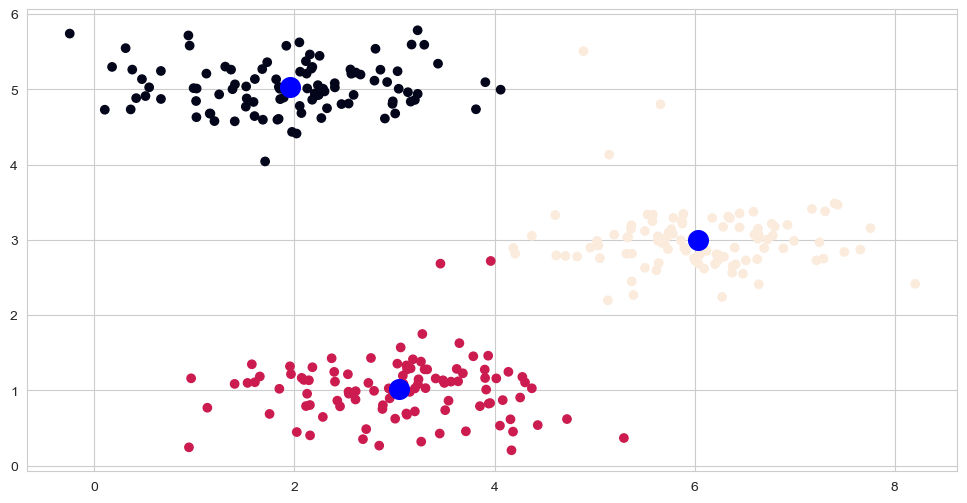

In [6]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.scatter(x = X[:,0], y = X[:,1], c=label)
plt.scatter(x = model.Centorids[:,0], y = model.Centorids[:,1], color='blue', s=200)
